# FIN3080 Assignment 2
#### 122090091 Dou Boshu

---

## Problem 1&2

### preparation session

Reading Data:

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 恢复默认设置
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

# 读取包含股价数据的表格
df_price = pd.read_excel('/Users/douboshu/Documents/大二下/FIN3080/AS2/Monthly Stock Price  Returns112316973/TRD_Mnth_AS2.xlsx')
# 读取包含Net_Assets和ROE的表格
df_index_per_Share = pd.read_excel('/Users/douboshu/Documents/大二下/FIN3080/AS2/Index per Share(Merge Query)112839326/Index_per_Share(Merge Query)_AS2.xlsx')
# 读取包含风险的表格
df_Risk = pd.read_excel('/Users/douboshu/Documents/大二下/FIN3080/AS2/Risk Factor Indices of Individual Stocks (250- Trading Day Rolling Samples)150932241/Risk_Factors_AS2.xlsx')


Cleaning Data:

In [47]:
# 删除第一行单位数据
df_price = df_price.drop(0)
df_index_per_Share = df_index_per_Share.drop(0)
df_Risk = df_Risk.drop(0)


# 重置索引
df_price = df_price.reset_index(drop=True)
df_index_per_Share = df_index_per_Share.reset_index(drop=True)
df_Risk = df_Risk.reset_index(drop=True)

# 改变数据类型
# df_price
df_price['Stock_Code'] = df_price['Stock_Code'].astype('string',errors='ignore')
df_price['Monthly_Closing_Price'] = df_price['Monthly_Closing_Price'].astype('float',errors='ignore')
df_price['Monthly_Return'] = df_price['Monthly_Return'].astype('float',errors='ignore')
df_price['Trading_Month'] = df_price['Trading_Month'].astype('string', errors='ignore')

# df_index_per_Share
df_index_per_Share['Stock_Code'] = df_index_per_Share['Stock_Code'].astype('string',errors='ignore')
df_index_per_Share['Stock_Short_Name'] = df_index_per_Share['Stock_Short_Name'].astype('string',errors='ignore')
df_index_per_Share['Ending_Date'] = df_index_per_Share['Ending_Date'].astype('string',errors='ignore')
df_index_per_Share['Statement_Type'] = df_index_per_Share['Statement_Type'].astype('string',errors='ignore')
df_index_per_Share['Net_Assets_per_Share'] = df_index_per_Share['Net_Assets_per_Share'].astype('float',errors='ignore')
df_index_per_Share['ROE_TTM'] = df_index_per_Share['ROE_TTM'].astype('float',errors='ignore')

# df_Risk
df_Risk['Stock_Code'] = df_Risk['Stock_Code'].astype('string',errors='ignore')
df_Risk['Trading_Date'] = df_Risk['Trading_Date'].astype('string',errors='ignore')
df_Risk['Return_Volatility'] = df_Risk['Return_Volatility'].astype('float',errors='ignore')

# 删除包含数值为 'B' 的元素所在的行
df_index_per_Share = df_index_per_Share.drop(df_index_per_Share[df_index_per_Share['Statement_Type'] == 'B'].index)

# 重置索引
df_index_per_Share = df_index_per_Share.reset_index(drop=True)


Writing get_data() Function for df_price to generate lagged variables:

In [48]:
def get_date(p_date):
    old_year = p_date[:4]
    old_year = int(old_year)
    str_old_month = p_date[-2:]
    
    if str_old_month in ['01', '02', '03']:
        new_year = old_year - 1  # 去年的第4季度, year_12_31
        new_month = '12'
        new_day = '31'
    elif str_old_month in ['04', '05', '06']:
        new_year = old_year   # 今年的第1季度, year_03_31
        new_month = '03'
        new_day = '31'
    elif str_old_month in ['07', '08', '09']:
        new_year = old_year   # 今年的第2季度, year_06_30
        new_month = '06'
        new_day = '30'
    elif str_old_month in ['10', '11', '12']:
        new_year = old_year  # 今年的第3季度, year_09_30
        new_month = '09'
        new_day = '30'

    new_date = str(new_year) + '-' + new_month + '-' + new_day
    return new_date

df_price_2 = df_price.copy()
df_price_2['Ending_Date'] = df_price_2['Trading_Month'].apply(get_date)
df_price_2['Ending_Date'] = df_price_2['Ending_Date'].astype('string',errors='ignore')
print(df_price_2)

       Stock_Code Trading_Month  Monthly_Closing_Price  Monthly_Return  \
0          000001       2009-12                  24.37        0.004534   
1          000001       2010-01                  21.70       -0.109561   
2          000001       2010-02                  22.45        0.034562   
3          000001       2010-03                  23.20        0.033408   
4          000001       2010-04                  20.56       -0.113793   
...           ...           ...                    ...             ...   
542338     873726       2023-10                  21.80             NaN   
542339     873726       2023-11                  29.15        0.337156   
542340     873726       2023-12                  43.64        0.497084   
542341     873833       2023-11                  14.25             NaN   
542342     873833       2023-12                  15.06        0.056842   

       Ending_Date  
0       2009-09-30  
1       2009-12-31  
2       2009-12-31  
3       2009-12-31  
4     

Merging

In [49]:
# 合并 df_price_2 与 df_index_per_Share
df_left_join_result = pd.merge(df_price_2, df_index_per_Share, on=['Stock_Code', 'Ending_Date',], how='left')

# 重置索引
df_left_join_result = df_left_join_result.reset_index(drop=True)
print(df_left_join_result)

       Stock_Code Trading_Month  Monthly_Closing_Price  Monthly_Return  \
0          000001       2009-12                  24.37        0.004534   
1          000001       2010-01                  21.70       -0.109561   
2          000001       2010-02                  22.45        0.034562   
3          000001       2010-03                  23.20        0.033408   
4          000001       2010-04                  20.56       -0.113793   
...           ...           ...                    ...             ...   
542338     873726       2023-10                  21.80             NaN   
542339     873726       2023-11                  29.15        0.337156   
542340     873726       2023-12                  43.64        0.497084   
542341     873833       2023-11                  14.25             NaN   
542342     873833       2023-12                  15.06        0.056842   

       Ending_Date Stock_Short_Name Statement_Type  Net_Assets_per_Share  \
0       2009-09-30             SFZA

Calculating: PB
Exclude records with P/B ratios less than P/B ratio’s 5th percentile or greater than P/B ratio’s 95th percentile.

In [50]:
df_left_join_result['P/B'] = df_left_join_result['Monthly_Closing_Price'] / df_left_join_result['Net_Assets_per_Share']
print(df_left_join_result)

       Stock_Code Trading_Month  Monthly_Closing_Price  Monthly_Return  \
0          000001       2009-12                  24.37        0.004534   
1          000001       2010-01                  21.70       -0.109561   
2          000001       2010-02                  22.45        0.034562   
3          000001       2010-03                  23.20        0.033408   
4          000001       2010-04                  20.56       -0.113793   
...           ...           ...                    ...             ...   
542338     873726       2023-10                  21.80             NaN   
542339     873726       2023-11                  29.15        0.337156   
542340     873726       2023-12                  43.64        0.497084   
542341     873833       2023-11                  14.25             NaN   
542342     873833       2023-12                  15.06        0.056842   

       Ending_Date Stock_Short_Name Statement_Type  Net_Assets_per_Share  \
0       2009-09-30             SFZA

In [51]:
# 删除NaN值
df_left_join_result_cleaned = df_left_join_result.dropna().reset_index(drop=True)
print(df_left_join_result_cleaned)

       Stock_Code Trading_Month  Monthly_Closing_Price  Monthly_Return  \
0          000001       2009-12                  24.37        0.004534   
1          000001       2010-01                  21.70       -0.109561   
2          000001       2010-02                  22.45        0.034562   
3          000001       2010-03                  23.20        0.033408   
4          000001       2010-04                  20.56       -0.113793   
...           ...           ...                    ...             ...   
514079     873665       2023-10                   5.69       -0.032313   
514080     873665       2023-11                   8.92        0.567663   
514081     873665       2023-12                  12.20        0.367713   
514082     873726       2023-11                  29.15        0.337156   
514083     873726       2023-12                  43.64        0.497084   

       Ending_Date Stock_Short_Name Statement_Type  Net_Assets_per_Share  \
0       2009-09-30             SFZA

In [52]:
df_left_join_result_cleaned2 = df_left_join_result_cleaned.copy()

# 计算 P/B 比率的第 5 和第 95 百分位数
pb_5th_percentile = df_left_join_result_cleaned2['P/B'].quantile(0.05)
pb_95th_percentile = df_left_join_result_cleaned2['P/B'].quantile(0.95)

# 根据条件筛选 DataFrame
filtered_df_left_join_result_cleaned = df_left_join_result_cleaned2[(df_left_join_result_cleaned2['P/B'] >= pb_5th_percentile) & (df_left_join_result_cleaned2['P/B'] <= pb_95th_percentile)]
filtered_df_left_join_result_cleaned = filtered_df_left_join_result_cleaned.reset_index(drop=True)

print(filtered_df_left_join_result_cleaned)

       Stock_Code Trading_Month  Monthly_Closing_Price  Monthly_Return  \
0          000001       2009-12                  24.37        0.004534   
1          000001       2010-01                  21.70       -0.109561   
2          000001       2010-02                  22.45        0.034562   
3          000001       2010-03                  23.20        0.033408   
4          000001       2010-04                  20.56       -0.113793   
...           ...           ...                    ...             ...   
462669     873665       2023-10                   5.69       -0.032313   
462670     873665       2023-11                   8.92        0.567663   
462671     873665       2023-12                  12.20        0.367713   
462672     873726       2023-11                  29.15        0.337156   
462673     873726       2023-12                  43.64        0.497084   

       Ending_Date Stock_Short_Name Statement_Type  Net_Assets_per_Share  \
0       2009-09-30             SFZA

### Problem 1

In [53]:

df_dec_2010 = filtered_df_left_join_result_cleaned[filtered_df_left_join_result_cleaned['Trading_Month'] == '2010-12']
df_dec_2010 = df_dec_2010.reset_index(drop=True)

# 创建新的一列，并设置所有值为 "2010-12-31"
df_dec_2010 = df_dec_2010.assign(lagged_date="2010-12-31")

# 将lagged_date列的数据类型转换为 string
df_dec_2010['lagged_date'] = df_dec_2010['lagged_date'].astype('string',errors='ignore')

# 打印新的 DataFrame
print(df_dec_2010)

     Stock_Code Trading_Month  Monthly_Closing_Price  Monthly_Return  \
0        000001       2010-12                  15.79       -0.036608   
1        000002       2010-12                   8.22        0.011070   
2        000004       2010-12                  12.04       -0.063764   
3        000005       2010-12                   3.67       -0.046753   
4        000006       2010-12                   6.97        0.013081   
...         ...           ...                    ...             ...   
1462     601958       2010-12                  24.24        0.012954   
1463     601988       2010-12                   3.23       -0.012232   
1464     601991       2010-12                   6.09       -0.077273   
1465     601998       2010-12                   5.25       -0.033149   
1466     601999       2010-12                  10.60       -0.045905   

     Ending_Date Stock_Short_Name Statement_Type  Net_Assets_per_Share  \
0     2010-09-30             SFZA              A             

In [54]:
# 改变df_Risk "Trading_Date"的名字为 "lagged_date"
df_Risk = df_Risk.rename(columns={'Trading_Date': 'lagged_date'})

# 合并 df_dec_2010 与 df_Risk
df_dec_2010 = pd.merge(df_dec_2010, df_Risk, on=['Stock_Code', 'lagged_date'], how='left')

# 将df_dec_2010的P/B，ROE_TTM，Return_Volatility提取出来
df_P1_ans_table = df_dec_2010[['Stock_Code', 'Stock_Short_Name', 'P/B', 'ROE_TTM', 'Return_Volatility']]
print(df_P1_ans_table)

     Stock_Code Stock_Short_Name       P/B   ROE_TTM  Return_Volatility
0        000001             SFZA  1.711926  0.239194           0.375077
1        000002              WKA  1.831914  0.143634           0.360978
2        000004            ST GN  7.999336  0.229803           0.382118
3        000005             SJXY  4.969425 -0.090036           0.409691
4        000006             SZYA  2.436701  0.141314           0.502408
...         ...              ...       ...       ...                ...
1462     601958             JMGF  5.873981  0.049726           0.517640
1463     601988             ZGYH  1.371196  0.183965           0.201127
1464     601991             DTFD  2.026694  0.093324           0.285140
1465     601998             ZXYH  1.693021  0.183411           0.357737
1466     601999             CBCM  3.828095  0.088044           0.419746

[1467 rows x 5 columns]


In [55]:
# 删除包含缺失值的行
df_P1_ans_table.dropna(inplace=True)

# 提取自变量（ROE_TTM 和 Return_Volatility）和因变量（P/B）
X = df_P1_ans_table[['ROE_TTM', 'Return_Volatility']]
y = df_P1_ans_table['P/B']

# 添加常数项到自变量中
X = sm.add_constant(X)

# 拟合线性回归模型
model = sm.OLS(y, X).fit()

# 打印回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    P/B   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     110.1
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           4.61e-45
Time:                        19:27:45   Log-Likelihood:                -2799.7
No. Observations:                1373   AIC:                             5605.
Df Residuals:                    1370   BIC:                             5621.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1168      0.28

/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_6699/2076390562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P1_ans_table.dropna(inplace=True)


### Problem 2

In [56]:
# 打印全部数据
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# 恢复默认设置
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')


# 把filtered_df_left_join_result_cleaned的Stock_Code，Stock_Short_Name,Trading_Month,P/B提取出来
df_P2_ans_table_raw = filtered_df_left_join_result_cleaned[['Stock_Code', 'Stock_Short_Name', 'Trading_Month', 'P/B', 'Monthly_Return']]
print(df_P2_ans_table_raw)

       Stock_Code Stock_Short_Name Trading_Month       P/B  Monthly_Return
0          000001             SFZA       2009-12  3.964674        0.004534
1          000001             SFZA       2010-01  3.292096       -0.109561
2          000001             SFZA       2010-02  3.405878        0.034562
3          000001             SFZA       2010-03  3.519660        0.033408
4          000001             SFZA       2010-04  2.887753       -0.113793
...           ...              ...           ...       ...             ...
462669     873665             KQGF       2023-10  1.124139       -0.032313
462670     873665             KQGF       2023-11  1.762270        0.567663
462671     873665             KQGF       2023-12  2.410280        0.367713
462672     873726             ZZDJ       2023-11  6.366081        0.337156
462673     873726             ZZDJ       2023-12  9.530559        0.497084

[462674 rows x 5 columns]


In [57]:
# 按照股票代码分组，并计算每个股票的上一个月的 P/B
df_P2_ans_table_raw['last_month_P/B'] = df_P2_ans_table_raw.groupby('Stock_Code')['P/B'].shift(1)
print(df_P2_ans_table_raw)

       Stock_Code Stock_Short_Name Trading_Month       P/B  Monthly_Return  \
0          000001             SFZA       2009-12  3.964674        0.004534   
1          000001             SFZA       2010-01  3.292096       -0.109561   
2          000001             SFZA       2010-02  3.405878        0.034562   
3          000001             SFZA       2010-03  3.519660        0.033408   
4          000001             SFZA       2010-04  2.887753       -0.113793   
...           ...              ...           ...       ...             ...   
462669     873665             KQGF       2023-10  1.124139       -0.032313   
462670     873665             KQGF       2023-11  1.762270        0.567663   
462671     873665             KQGF       2023-12  2.410280        0.367713   
462672     873726             ZZDJ       2023-11  6.366081        0.337156   
462673     873726             ZZDJ       2023-12  9.530559        0.497084   

        last_month_P/B  
0                  NaN  
1            

/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_6699/3689397010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P2_ans_table_raw['last_month_P/B'] = df_P2_ans_table_raw.groupby('Stock_Code')['P/B'].shift(1)


In [58]:
# 删除包含缺失值的行同时恢复索引
df_P2_ans_table_raw.dropna(inplace=True)

# 恢复索引
df_P2_ans_table_raw = df_P2_ans_table_raw.reset_index(drop=True)

print(df_P2_ans_table_raw)

       Stock_Code Stock_Short_Name Trading_Month       P/B  Monthly_Return  \
0          000001             SFZA       2010-01  3.292096       -0.109561   
1          000001             SFZA       2010-02  3.405878        0.034562   
2          000001             SFZA       2010-03  3.519660        0.033408   
3          000001             SFZA       2010-04  2.887753       -0.113793   
4          000001             SFZA       2010-05  2.459366       -0.148346   
...           ...              ...           ...       ...             ...   
457361     873593             DZKJ       2023-11  7.219816        0.880506   
457362     873593             DZKJ       2023-12  5.646455       -0.217923   
457363     873665             KQGF       2023-11  1.762270        0.567663   
457364     873665             KQGF       2023-12  2.410280        0.367713   
457365     873726             ZZDJ       2023-12  9.530559        0.497084   

        last_month_P/B  
0             3.964674  
1            

/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_6699/1488467853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_P2_ans_table_raw.dropna(inplace=True)


In [59]:
# 定义一个函数来在每个月内对数据进行排序
def sort_by_PB(p_group):
    p_group.sort_values(by='last_month_P/B', inplace=True)
    return p_group

# 在每个月内按上个月的P/B的大小排序
df_P2_ans_table_sort_PB = df_P2_ans_table_raw.groupby('Trading_Month').apply(sort_by_PB)

# 恢复索引
df_P2_ans_table_sort_PB = df_P2_ans_table_sort_PB.reset_index(drop=True)

print(df_P2_ans_table_sort_PB)

       Stock_Code Stock_Short_Name Trading_Month       P/B  Monthly_Return  \
0          600839             SCCH       2010-01  0.958052        0.033537   
1          000488             CMZY       2010-01  1.130574       -0.056075   
2          600215             CCJK       2010-01  1.191351       -0.059113   
3          000932             HLGT       2010-01  0.966368       -0.198175   
4          600569             AYGT       2010-01  1.073054       -0.169580   
...           ...              ...           ...       ...             ...   
457361     688331             RCSW       2023-12  8.537640       -0.108205   
457362     688050             ABYL       2023-12  8.421661       -0.120675   
457363     300760             MRYL       2023-12  9.568779       -0.000928   
457364     000622             HLSY       2023-12  9.508592       -0.047826   
457365     600228             FLKJ       2023-12  9.456391       -0.026217   

        last_month_P/B  
0             0.935433  
1            

/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_6699/2253564952.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_P2_ans_table_sort_PB = df_P2_ans_table_raw.groupby('Trading_Month').apply(sort_by_PB)


In [60]:
# 在每个月内计算将各支股票按照last_month_P/B的大小分为十组
df_P2_ans_table_sort_PB['decile'] = df_P2_ans_table_sort_PB.groupby('Trading_Month')['last_month_P/B'].transform(lambda x: pd.qcut(x, 10, labels=False))
df_P2_ans_table_sort_PB['decile'] = df_P2_ans_table_sort_PB['decile'] + 1
# print(df_P2_ans_table_sort_PB)

# df_P2_ans_table_sort_PB.to_csv('sample.csv')


In [61]:
# 在每个月内计算同一组内的股票的平均return
df_average_return = df_P2_ans_table_sort_PB.groupby(['Trading_Month', 'decile'])['Monthly_Return'].mean().reset_index()

print(df_average_return)

     Trading_Month  decile  Monthly_Return
0          2010-01       1       -0.043953
1          2010-01       2       -0.026670
2          2010-01       3       -0.027841
3          2010-01       4       -0.020299
4          2010-01       5       -0.031103
...            ...     ...             ...
1675       2023-12       6        0.002694
1676       2023-12       7       -0.002191
1677       2023-12       8       -0.008941
1678       2023-12       9       -0.017629
1679       2023-12      10       -0.034053

[1680 rows x 3 columns]


In [62]:
# 计算每个decile在所有月份的平均return
df_average_return_all = df_average_return.groupby('decile')['Monthly_Return'].mean().reset_index()
print(df_average_return_all)

   decile  Monthly_Return
0       1        0.018126
1       2        0.013249
2       3        0.013153
3       4        0.011617
4       5        0.011076
5       6        0.011053
6       7        0.009604
7       8        0.007719
8       9        0.004754
9      10       -0.013460


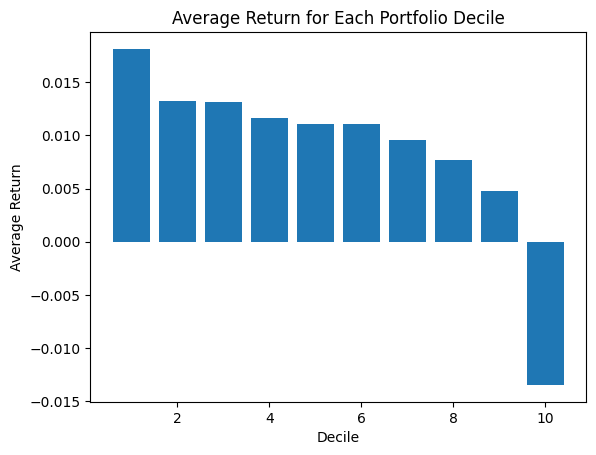

In [63]:
# 用bar chart表示出来，横轴表示且标明decile，纵轴表示且标明Monthly_Return
plt.bar(df_average_return_all['decile'], df_average_return_all['Monthly_Return'])
plt.xlabel('Decile')
plt.ylabel('Average Return')
plt.title('Average Return for Each Portfolio Decile')
plt.show()